# Machine Learning (All the Features)

## Modules and functions

Import all the modules:

In [1]:
import pandas as pd

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

from notebooks import *

## Loading

In [2]:
df_file_path = "dataset-filtered.csv"
df = pd.read_csv(df_file_path, low_memory=False)

In [3]:
print_dimensions(df)

The dataset has 158863 rows and 434 columns


## Prepare data

In [4]:
addresses, X, y_binary, y_multi, scaler, feature_names = extract_experiment_data(df)

Scaled columns:
contract_compiler_runs: [0, 330000000]
contract_num_source_code_lines: [1, 11409]
internal_transaction_count: [0, 1536860]
normal_transaction_block_span: [0, 6415588]
normal_transaction_count: [1, 10412943]
normal_transaction_block_delta_mean: [0, 3693174]
normal_transaction_block_delta_std: [0, 2248615]
normal_transaction_count_per_block_mean: [1, 49]
normal_transaction_count_per_block_std: [0, 74]
normal_transaction_gas_mean: [23112, 8003887]
normal_transaction_gas_std: [0, 3985463]
normal_transaction_gas_used_mean: [21421, 7906343]
normal_transaction_gas_used_std: [0, 3717662]
normal_transaction_time_delta_mean: [0, 57482326]
normal_transaction_time_delta_std: [0, 34437373]
normal_transaction_value_mean: [0, 204365823294587692646400]
normal_transaction_value_std: [0, 1285685747689323210211328]

Extracted values:
addresses (158863,)
features (158863, 430)
labels_binary (158863,)
labels_multi (158863,)


In [5]:
for feature_name in feature_names:
    print(feature_name)

contract_compiler_runs
contract_num_source_code_lines
internal_transaction_count
normal_transaction_block_span
normal_transaction_count
normal_transaction_block_delta_mean
normal_transaction_block_delta_std
normal_transaction_count_per_block_mean
normal_transaction_count_per_block_std
normal_transaction_gas_mean
normal_transaction_gas_std
normal_transaction_gas_used_mean
normal_transaction_gas_used_std
normal_transaction_time_delta_mean
normal_transaction_time_delta_std
normal_transaction_value_mean
normal_transaction_value_std
contract_has_library
has_internal_transactions
normal_transaction_before_creation_ratio
normal_transaction_block_ratio
normal_transaction_from_other_ratio
normal_transaction_other_sender_ratio
contract_compiler_minor_version_0
contract_compiler_minor_version_1
contract_compiler_minor_version_2
contract_compiler_minor_version_3
contract_compiler_patch_0
contract_compiler_patch_1
contract_compiler_patch_2
contract_compiler_patch_3
contract_compiler_patch_4
contrac

## Classification

In [6]:
xgb_scale_pos_weight = compute_scale_pos_weight(y_binary)

In [7]:
def create_xgb_model():
    return XGBClassifier(n_jobs=10,
                         scale_pos_weight=xgb_scale_pos_weight,
                         n_estimators=25,
                         max_depth=3)

In [8]:
xgb_models = train_test_folds(X,
                              y_binary,
                              k_fold(X, n_splits=10),
                              create_xgb_model)

train ROC AUC 0.987 TN  140443 FP  2260 FN     3 TP   270
test  ROC AUC 0.947 TN  15635 FP   230 FN     2 TP    20
train score - test score = 0.039

train ROC AUC 0.986 TN  140822 FP  1893 FN     4 TP   257
test  ROC AUC 0.979 TN  15643 FP   210 FN     1 TP    33
train score - test score = 0.007

train ROC AUC 0.984 TN  140929 FP  1785 FN     5 TP   257
test  ROC AUC 0.948 TN  15655 FP   199 FN     3 TP    30
train score - test score = 0.036

train ROC AUC 0.984 TN  140949 FP  1764 FN     5 TP   259
test  ROC AUC 0.994 TN  15680 FP   175 FN     0 TP    31
train score - test score = -0.010

train ROC AUC 0.983 TN  140943 FP  1765 FN     6 TP   263
test  ROC AUC 0.994 TN  15659 FP   201 FN     0 TP    26
train score - test score = -0.011

train ROC AUC 0.986 TN  140762 FP  1945 FN     4 TP   266
test  ROC AUC 0.953 TN  15651 FP   210 FN     2 TP    23
train score - test score = 0.032

train ROC AUC 0.985 TN  141098 FP  1616 FN     5 TP   258
test  ROC AUC 0.947 TN  15673 FP   181 FN     

In [9]:
feature_importance = compute_average_feature_importance(X, xgb_models)

In [10]:
display(create_feature_importance_table(feature_names, feature_importance, size=10))

,Feature,Importance
0,symbol_83,0.683355
1,normal_transaction_value_mean,0.105948
2,contract_num_source_code_lines,0.058222
3,normal_transaction_gas_mean,0.036259
4,contract_compiler_patch_137,0.021729
5,normal_transaction_gas_used_mean,0.015829
6,normal_transaction_value_std,0.014596
7,contract_compiler_patch_125,0.009466
8,normal_transaction_block_span,0.007735
9,symbol_73,0.007420


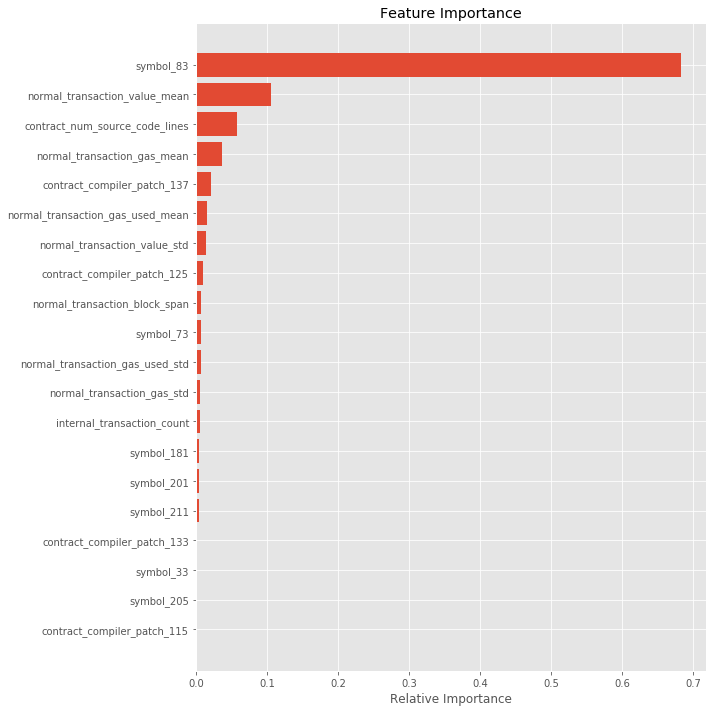

In [11]:
plot_feature_importance(feature_names, feature_importance)